### Best hyperparameters thus far:

Intra:  conn_prob = .85, weight_init_exp=.85, weight_init_std=.2

Inter:  conn_prob=.25, weight_init_exp=-.7, weight_init_std=.2

In [1]:
import matplotlib.pyplot as plt

from HebbNet import *

In [2]:
class ModularHebb(HebbNet):
    def __init__(self, module_size, num_modules, intra_prob=.85, inter_prob=.25, scale=30):
        super().__init__(scale=scale)
        self.module_size = module_size
        self.num_modules = num_modules
        num_neurons = module_size * num_modules
        for j in range(1, num_neurons + 1):
            self.add_neuron()
        for i in range(1, num_neurons + 1):
            for j in range(1, num_neurons + 1):
                if i//num_modules == j//num_modules:
                    if np.random.uniform() < intra_prob:
                        self.connect_neurons(i, j, weight_init_exp=.85, weight_init_std=.2)
                else:
                    if np.random.uniform() < inter_prob:
                        self.connect_neurons(i, j, weight_init_exp=-.7, weight_init_std=.2)
                        
    def process_vec(self, vec, memory1=.1, memory2=.7, firing_count=1):
        for _ in range(firing_count):
            self.fire_neurons(memory1)
        self.new_inputs(vec, memory2)
        
    def visualize(self):
        grid = self.get_encoding().reshape(self.num_modules, self.module_size)
        plt.imshow(grid, cmap='gray_r')

In [3]:
def sparse_input(active_rows, num_rows, nums_per_row):
    rows = []
    for j in range(num_rows):
        if j in active_rows:
            rows.append(np.random.rand(nums_per_row))
        else:
            rows.append(np.zeros(nums_per_row))
    return np.concatenate(rows)

In [5]:
net = ModularHebb(25, 25)

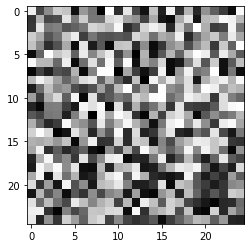

In [6]:
k = 25
v = sparse_input([j for j in range(k)], k, k)
net.process_vec(v)
net.visualize()

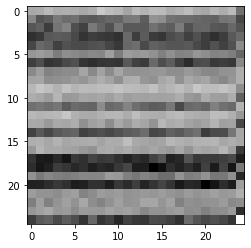

In [7]:
for k in range(30):
    net.fire_neurons(.2)
net.visualize()

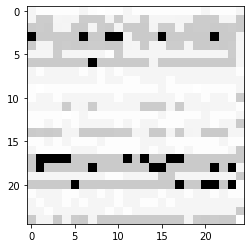

In [8]:
for k in range(30):
    net.fire_neurons(.2)
net.visualize()

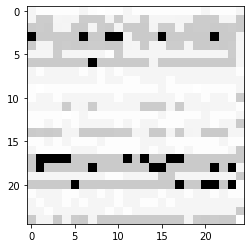

In [9]:
for k in range(30):
    net.fire_neurons(.2)
net.visualize()

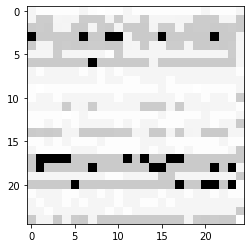

In [10]:
for k in range(30):
    net.fire_neurons(.2)
net.visualize()

In [7]:
net.clear_neurons()